---

## Objetivo del Proyecto

El objetivo de este proyecto es explorar un conjunto de datos relacionado con accidentes cerebrovasculares y entender qué factores contribuyen significativamente a la incidencia de estos eventos médicos. A través de este análisis, busco generar insights valiosos que puedan ser útiles para la prevención y el tratamiento de accidentes cerebrovasculares.

---


## Preguntas de Investigación

Las preguntas que guiarán este análisis son las siguientes:

1. ¿Cuáles son los principales factores de riesgo para sufrir un accidente cerebrovascular según los datos?
2. ¿Existe una correlación entre el nivel medio de glucosa y la incidencia de accidentes cerebrovasculares?
3. ¿El lugar de residencia (urbano vs rural) tiene un impacto en la probabilidad de sufrir un accidente cerebrovascular?
4. ¿Cómo varía la probabilidad de sufrir un accidente cerebrovascular a lo largo de diferentes grupos de edad?
5. ¿El tipo de trabajo está relacionado con la probabilidad de sufrir un accidente cerebrovascular?
6. ¿Haberse casado alguna vez influye en tener un accidente cerebrovascular?

---



## Importación de Librerías y Datos

Importando librerias para analisis de datos

In [1]:
import pandas as pd
import numpy as np

Importando datos obtenidos de accientes cerebrovasculares del repositorio de datos de kaggle: https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset/data

Cargar el archivo CSV en un DataFrame de Pandas

In [2]:
stroke_data = pd.read_csv("brain_stroke.csv")

---

## Inspección Inicial de los Datos

---

Mostrar las primeras filas verificar que se haya cargado correctamente

In [3]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Verificar la información del dataset

In [4]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


verificar el tamaño del dataset

In [5]:
stroke_data.shape

(4981, 11)

## Descripción del Conjunto de Datos

El conjunto de datos que estamos analizando contiene información sobre 4,981 individuos y abarca diversas características relacionadas con la salud y el estilo de vida. A continuación, se detallan las variables incluidas en el conjunto de datos:

### Variables

#### Demográficas
- **Género**: El género del individuo (ej. Masculino, Femenino).
- **Edad**: La edad del individuo en años.

#### Salud
- **Hipertensión**: Indica si el individuo tiene hipertensión (1 para sí, 0 para no).
- **Enfermedad Cardíaca**: Indica si el individuo tiene alguna enfermedad cardíaca (1 para sí, 0 para no).
- **Nivel Medio de Glucosa**: Nivel medio de glucosa en la sangre.
- **IMC**: Índice de Masa Corporal.

#### Estilo de Vida y Antecedentes Personales
- **Casado alguna vez**: Indica si el individuo ha estado casado alguna vez (Sí o No).
- **Tipo de Trabajo**: Categoría de empleo del individuo (ej. Privado, Autoempleado, etc.).
- **Tipo de Residencia**: Tipo de residencia del individuo (Urbana o Rural).
- **Estado de Fumador**: Estado actual respecto al consumo de tabaco (ej. Fumador, Exfumador, Nunca fumado).

#### Variable Objetivo
- **Accidente Cerebrovascular**: Indica si el individuo ha tenido un accidente cerebrovascular (1 para sí, 0 para no).

Con esta información, nuestro objetivo es explorar las relaciones entre estas variables y la incidencia de accidentes cerebrovasculares.

---
## Limpieza de Datos
---

### Calidad de los Datos y Valores Faltantes
No hay valores faltantes en ninguna de las columnas. Esto es positivo para el análisis ya que significa que no tenemos que manejar datos faltantes.



In [6]:
# Verificando valores faltantes
missing_values = stroke_data.isnull().sum()
missing_values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Identificar filas duplicadas

In [7]:
duplicated_rows = stroke_data.duplicated()

Mostrar filas duplicadas

In [8]:
stroke_data[duplicated_rows]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Podemos observar que no hay filas duplicadas

#### Revisando la consistencia de los datos

In [9]:
# Diccionario para almacenar los recuentos de valores únicos para cada columna categórica
unique_value_counts = {}

# Iterar a través de todas las columnas del DataFrame
for column in stroke_data.columns:
    # Si el tipo de datos de la columna es 'object', entonces es categórica
    if stroke_data[column].dtype == 'object':
        unique_value_counts[column] = stroke_data[column].value_counts()

# Ahora, unique_value_counts contiene la información de cada columna categórica
for column_name, column_data in unique_value_counts.items():
    print(f"Columna {column_name} tiene {len(column_data)} valores únicos")
    print(column_data, "\n")

Columna gender tiene 2 valores únicos
gender
Female    2907
Male      2074
Name: count, dtype: int64 

Columna ever_married tiene 2 valores únicos
ever_married
Yes    3280
No     1701
Name: count, dtype: int64 

Columna work_type tiene 4 valores únicos
work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: count, dtype: int64 

Columna Residence_type tiene 2 valores únicos
Residence_type
Urban    2532
Rural    2449
Name: count, dtype: int64 

Columna smoking_status tiene 4 valores únicos
smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: count, dtype: int64 



### Cantidad de Valores Únicos para Variables Categóricas
- **Género**: 2 valores únicos (Hombre Y Mujer)
- **Casado alguna vez**: 2 valores únicos (Sí, No)
- **Tipo de Trabajo**: 4 tipos únicos (Privado, Trabajador del gobierno, Autoempleado, Ama de casa cuidando a los hijos )
- **Tipo de Residencia**: 2 tipos únicos (Urbano, Rural)
- **Estado de Fumar**: 4 estados únicos (Deconocido, Fumador, Exfumador, nunca fumo)



In [10]:
summary_stats = stroke_data.describe()
summary_stats

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


### Estadísticas Resumidas
- **Edad**: Varía desde 0.08 hasta 82 años, con un promedio de aproximadamente 43.42 años.
- **Hipertensión**: Alrededor del 9.6% de los individuos tienen hipertensión.
- **Enfermedad Cardíaca**: Alrededor del 5.5% de los individuos tienen enfermedad cardíaca.
- **Nivel Promedio de Glucosa**: Varía desde 55.12 hasta 271.74, con un promedio de aproximadamente 105.94.
- **IMC**: Varía desde 14 hasta 48.9, con un promedio de aproximadamente 28.5.


---
## Análisis Exploratorio de Datos
---

In [11]:
import altair as alt

### Visualizando las columnas categorias

In [12]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Traduciendo el data set para las visualizaciones y experimentación

In [13]:

# Creando un diccionario para traducir los nombres de las columnas al español
column_translation = {
    'gender': 'género',
    'age': 'edad',
    'hypertension': 'hipertensión',
    'heart_disease': 'enfermedad_cardíaca',
    'ever_married': 'casado_alguna_vez',
    'work_type': 'tipo_de_trabajo',
    'Residence_type': 'tipo_de_residencia',
    'avg_glucose_level': 'nivel_promedio_de_glucosa',
    'bmi': 'índice_de_masa_corporal',
    'smoking_status': 'estado_de_tabaquismo',
    'stroke': 'accidente_cerebrovascular'
}

# Creando un diccionario para traducir los valores únicos en cada columna al español
value_translation = {
    'Male': 'Masculino',
    'Female': 'Femenino',
    'Other': 'Otro',
    'Yes': 'Sí',
    'No': 'No',
    'Private': 'Privado',
    'Self-employed': 'Autónomo',
    'Govt_job': 'Empleo_gubernamental',
    'Never_worked': 'Nunca_trabajado',
    'children': 'niños',
    'Urban': 'Urbano',
    'Rural': 'Rural',
    'formerly smoked': 'exfumador',
    'never smoked': 'nunca_fumado',
    'smokes': 'fuma',
    'Unknown': 'Desconocido'
}

# Traducir los nombres de las columnas
stroke_data_translated = stroke_data.rename(columns=column_translation)

# Traducir los valores en el DataFrame
for col in stroke_data_translated.columns:
    stroke_data_translated[col] = stroke_data_translated[col].map(value_translation).fillna(stroke_data_translated[col])

# Mostrar el DataFrame traducido
stroke_data_translated.head()

,género,edad,hipertensión,enfermedad_cardíaca,casado_alguna_vez,tipo_de_trabajo,tipo_de_residencia,nivel_promedio_de_glucosa,índice_de_masa_corporal,estado_de_tabaquismo,accidente_cerebrovascular
0,Masculino,67.0,0,1,Sí,Privado,Urbano,228.69,36.6,exfumador,1
1,Masculino,80.0,0,1,Sí,Privado,Rural,105.92,32.5,nunca_fumado,1
2,Femenino,49.0,0,0,Sí,Privado,Urbano,171.23,34.4,fuma,1
3,Femenino,79.0,1,0,Sí,Autónomo,Rural,174.12,24.0,nunca_fumado,1
4,Masculino,81.0,0,0,Sí,Privado,Urbano,186.21,29.0,exfumador,1


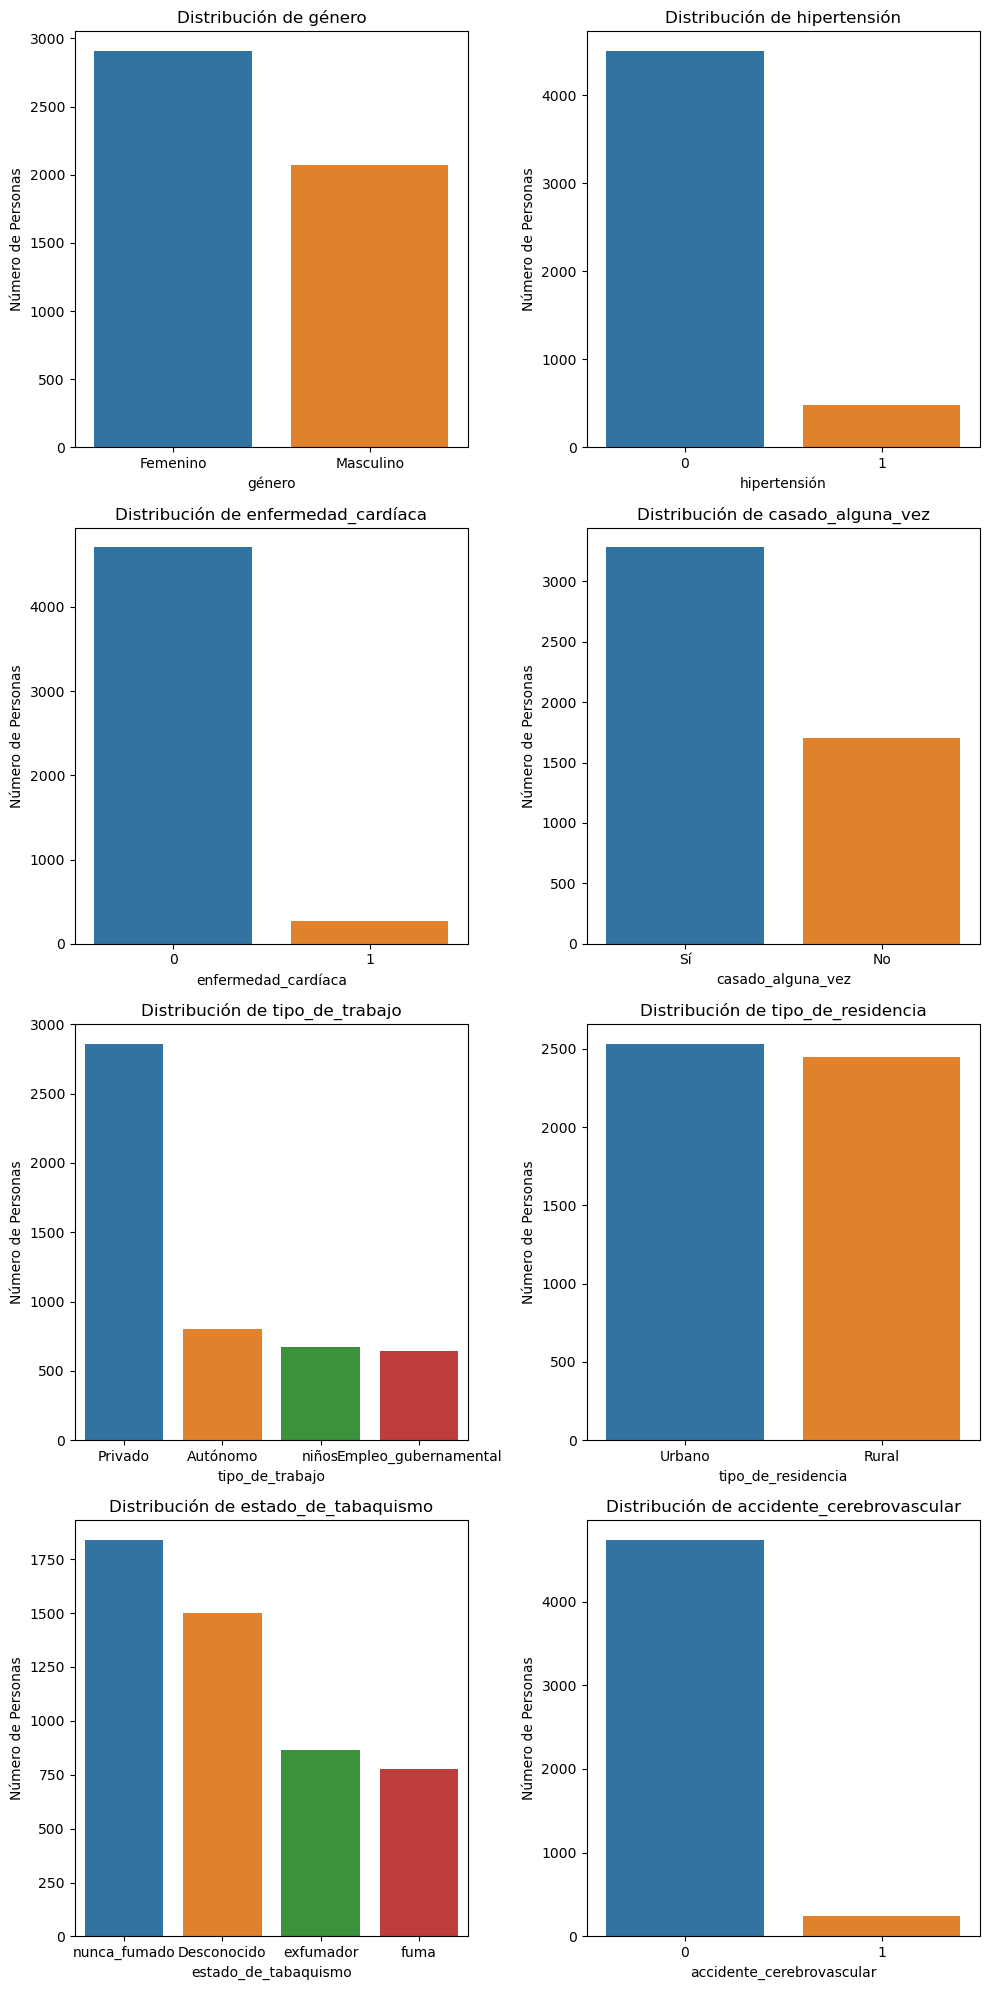

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas categóricas en el DataFrame traducido
categorical_columns_translated = ['género', 'hipertensión', 'enfermedad_cardíaca', 'casado_alguna_vez', 'tipo_de_trabajo', 'tipo_de_residencia', 'estado_de_tabaquismo', 'accidente_cerebrovascular']

# Número de filas y columnas para la grilla de gráficos
n_rows = len(categorical_columns_translated) // 2 + len(categorical_columns_translated) % 2
n_cols = 2

# Crear la figura y los ejes para los subgráficos
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))

# Iterar a través de las columnas categóricas y crear gráficos de barras
for i, column in enumerate(categorical_columns_translated):
    # Determinar la posición del subgráfico actual
    row = i // n_cols
    col = i % n_cols

    # Contar las frecuencias de cada categoría
    data = stroke_data_translated[column].value_counts().reset_index()
    data.columns = [column, 'Número de Personas']

    # Crear el gráfico de barras en el subgráfico correspondiente
    sns.barplot(x=column, y='Número de Personas', data=data, ax=axs[row, col])
    axs[row, col].set_title(f'Distribución de {column}')

# Ajustar el layout para evitar la superposición de títulos
plt.tight_layout()
plt.show()

## Distribución de Variables Categóricas

### Gráficas de Barras para Variables Categóricas

- **Distribución por género**: Hay más mujeres que hombres en el conjunto de datos.
- **Distribución por estado civil**: La mayoría de las personas en el conjunto de datos están casadas o han estado casadas alguna vez.
- **Distribución por tipo de trabajo**: La mayoría de las personas trabajan en el sector privado, seguido de los que son autónomos.
- **Distribución por tipo de residencia**: La distribución entre tipos de residencia (Urbano y Rural) parece bastante equilibrada.
- **Distribución por estado de fumar**: La mayoría de las personas nunca han fumado, seguido de los que solían fumar.

Estas gráficas ofrecen una visión general de cómo se distribuyen las variables categóricas en el conjunto de datos.

## Consideraciones para Modelos de Aprendizaje Automático

### Desequilibrio de Clases
Uno de los principales desafíos con este conjunto de datos es el desequilibrio en la variable objetivo (`stroke`). Un número significativamente menor de individuos han experimentado un derrame cerebral en comparación con los que no lo han hecho. Este desequilibrio podría llevar a un modelo que está sesgado hacia la clase mayoritaria, resultando en un rendimiento deficiente en la identificación de casos de derrame cerebral.

### Variables Categóricas
El conjunto de datos contiene varias variables categóricas como `gender`, `ever_married`, `work_type`, `Residence_type`, y `smoking_status`. Estas variables tendrán que ser codificadas adecuadamente antes de entrenar un modelo de aprendizaje automático.


### Resumen
Es crucial abordar estos desafíos mediante técnicas como el remuestreo para manejar el desequilibrio de clases, codificación de variables categóricas y selección de características para mejorar el rendimiento del modelo.

### Visualizando las columnas numericas

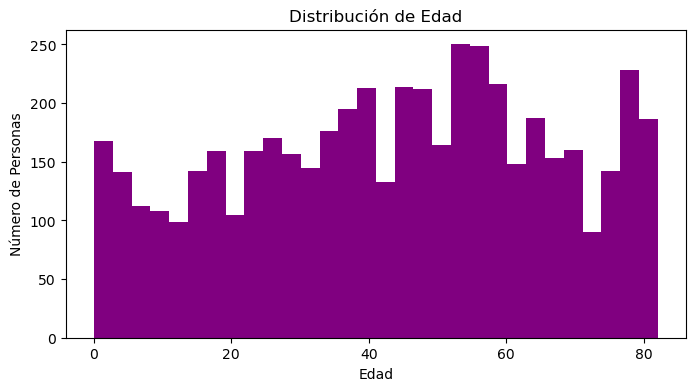

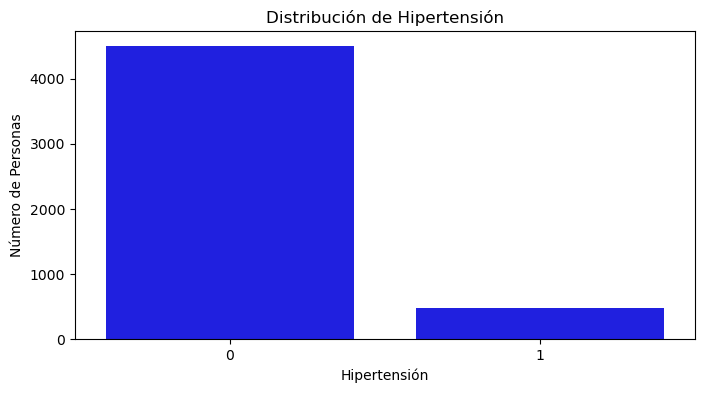

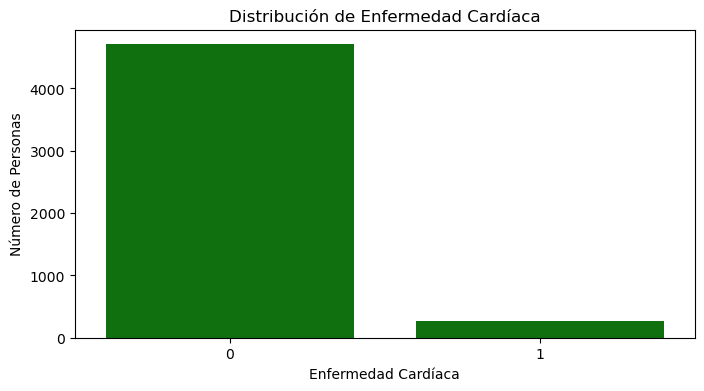

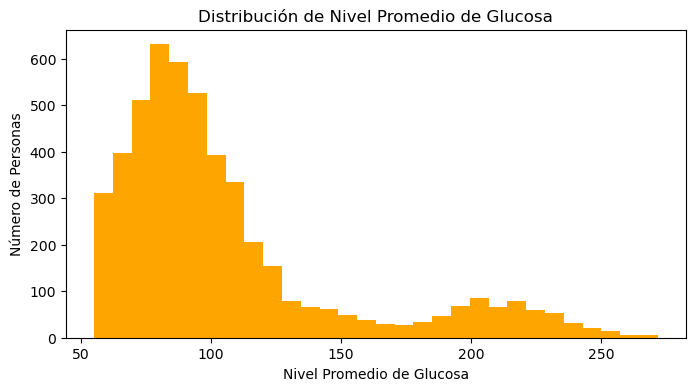

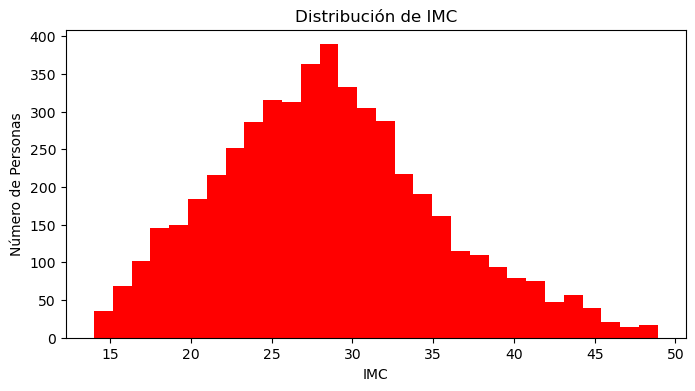

In [15]:
# Lista de columnas numéricas y sus descripciones en español
numerical_columns = [
    {'column': 'edad', 'description': 'Edad'},
    {'column': 'hipertensión', 'description': 'Hipertensión'},
    {'column': 'enfermedad_cardíaca', 'description': 'Enfermedad Cardíaca'},
    {'column': 'nivel_promedio_de_glucosa', 'description': 'Nivel Promedio de Glucosa'},
    {'column': 'índice_de_masa_corporal', 'description': 'IMC'}
]

# Lista de colores para cada columna
colors = ['purple', 'blue', 'green', 'orange', 'red']

# Función para crear un histograma para una columna numérica con un color específico
def create_histogram(meta, data, color):
    plt.figure(figsize=(8, 4))
    plt.title(f'Distribución de {meta["description"]}')
    if data[meta['column']].nunique() == 2:
        # Para variables binarias, usamos countplot de Seaborn
        sns.countplot(x=meta['column'], data=data, color=color)
        plt.xlabel(meta['description'])
        plt.ylabel('Número de Personas')
    else:
        # Para variables continuas, usamos hist de Matplotlib
        plt.hist(data[meta['column']], bins=30, color=color)
        plt.xlabel(meta['description'])
        plt.ylabel('Número de Personas')
    plt.show()

# Crear y mostrar los histogramas para cada columna numérica
for meta, color in zip(numerical_columns, colors):
    create_histogram(meta, stroke_data_translated, color)

## Observaciones Detalladas de Variables Numéricas

### Edad
Aunque la mayoría de los individuos están en el rango de 40 a 60 años, hay una representación significativa de todas las edades. Esto podría tener implicaciones en cómo la edad se relaciona con el riesgo de derrame cerebral.

### Hipertensión
La minoría de los individuos en el conjunto de datos tiene hipertensión. Esto plantea preguntas sobre cómo esta variable podría interactuar con otras para influir en el riesgo de derrame cerebral.

### Enfermedad Cardíaca
Similar a la hipertensión, la enfermedad cardíaca es poco común pero podría ser un factor crítico. Sería interesante examinar cómo esta variable se relaciona con la edad y otros factores de riesgo.

### Nivel Promedio de Glucosa
La mayoría de los individuos tienen niveles de glucosa en un rango que se consideraría normal o pre-diabético. Sin embargo, hay una cantidad significativa de valores atípicos en el extremo superior que podrían ser de interés clínico.

### IMC
El IMC tiende a agruparse en el rango que se consideraría como sobrepeso, lo que podría tener su propia serie de implicaciones para la salud.


## Exploración de la Relación entre Variables y Accidentes Cerebrovasculares

En esta sección, me centramos en entender cómo diferentes variables se relacionan con la probabilidad de sufrir un accidente cerebrovascular. Utilizando tanto gráficos de dispersión para las variables numéricas como gráficos de barras y de violín para las variables categóricas y binarias.

### Variables Numéricas
1. **Edad vs Accidente Cerebrovascular**: La edad parece ser un factor significativo, ya que los accidentes cerebrovasculares son más comunes en edades avanzadas.
2. **Nivel Promedio de Glucosa vs Accidente Cerebrovascular**: No se observa una relación clara.
3. **IMC vs Accidente Cerebrovascular**: Similar al nivel de glucosa, el IMC tampoco muestra una relación clara.



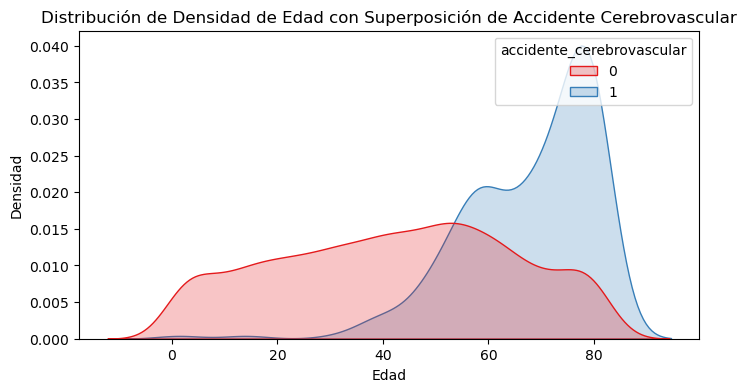

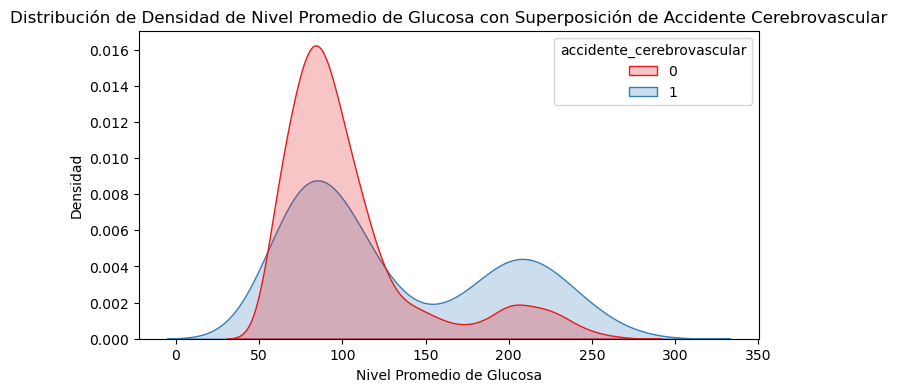

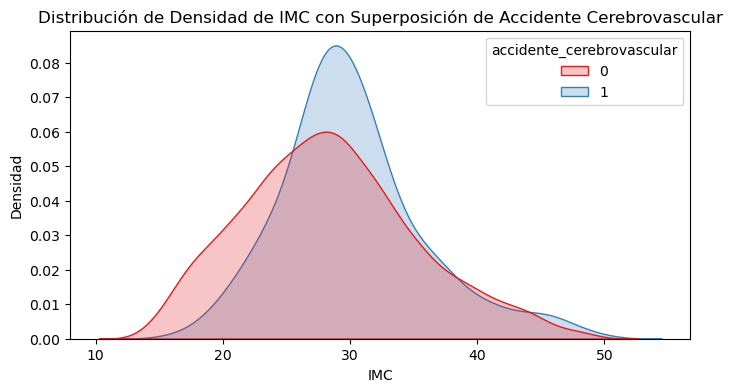

In [16]:


# Crear un diccionario para mapear nombres de columnas a sus descripciones en español
column_to_description = {item['column']: item['description'] for item in numerical_columns}

# Eliminar 'hipertensión' y 'enfermedad_cardíaca' del diccionario
column_to_description.pop('hipertensión', None)
column_to_description.pop('enfermedad_cardíaca', None)

# Recorrer las variables numéricas para crear gráficos de densidad
for var in column_to_description.keys():
    plt.figure(figsize=(8, 4))
    plt.title(f"Distribución de Densidad de {column_to_description[var]} con Superposición de Accidente Cerebrovascular")
    sns.kdeplot(data=stroke_data_translated, x=var, hue="accidente_cerebrovascular", common_norm=False, palette="Set1", fill=True)
    plt.xlabel(column_to_description[var])
    plt.ylabel("Densidad")
    plt.show()

### Observaciones sobre los Gráficos de Densidad con Superposición de Accidente Cerebrovascular

#### Edad (`age`)

- El gráfico muestra claramente que la incidencia de accidentes cerebrovasculares es mucho más alta en personas mayores. 
- La densidad de personas sin accidentes cerebrovasculares es bastante alta en las edades más jóvenes y disminuye a medida que aumenta la edad.

#### Nivel Promedio de Glucosa (`avg_glucose_level`)

- Hay dos picos notables para las personas con accidentes cerebrovasculares, uno en niveles bajos de glucosa y otro en niveles más altos. Esto podría sugerir que tanto niveles bajos como altos de glucosa podrían estar relacionados con un mayor riesgo de accidente cerebrovascular.
- La mayoría de las personas sin accidentes cerebrovasculares tienen un nivel de glucosa en un rango más "normal".

#### Índice de Masa Corporal (`bmi`)

- Para el índice de masa corporal, no se observa una diferencia significativa en la densidad entre las personas con y sin accidentes cerebrovasculares.
- Sin embargo, hay una ligera acumulación en el extremo más bajo del índice de masa corporal para las personas con accidentes cerebrovasculares.

Estas observaciones son preliminares y basadas en una revisión visual de los gráficos. Para conclusiones más sólidas, se requiere un análisis estadístico más detallado.

### Variables Categóricas y Binarias
- **Género, Tipo de Trabajo, Estado Civil**: Estas variables se exploran mediante gráficos de barras o de violín para entender su distribución en relación con los accidentes cerebrovasculares.
- **Hipertensión y Enfermedad Cardíaca**: Al ser variables binarias, se utilizan gráficos de barras para mostrar la proporción de casos con y sin accidentes cerebrovasculares.

Esta exploración visual nos ayuda a formar hipótesis iniciales sobre qué variables podrían ser más importantes para predecir los accidentes cerebrovasculares. Sin embargo, es crucial tener en cuenta que la visualización es sólo el primer paso. Se requerirá un análisis más profundo, posiblemente utilizando técnicas de aprendizaje automático, para validar estas hipótesis.


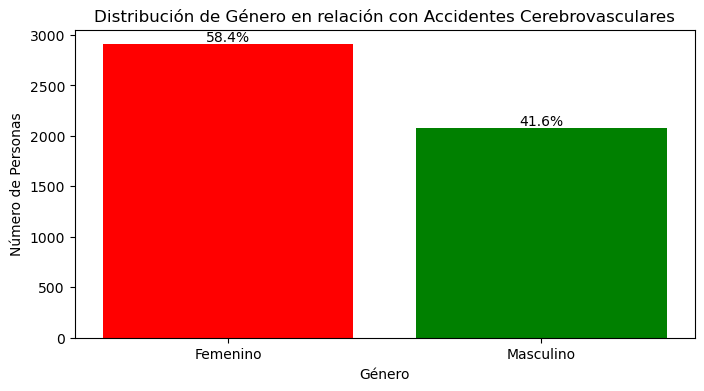

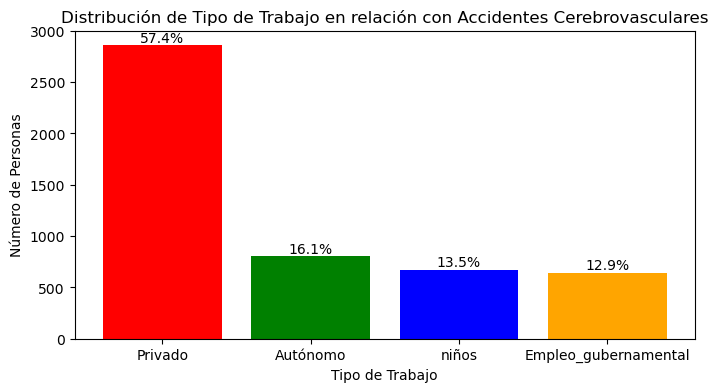

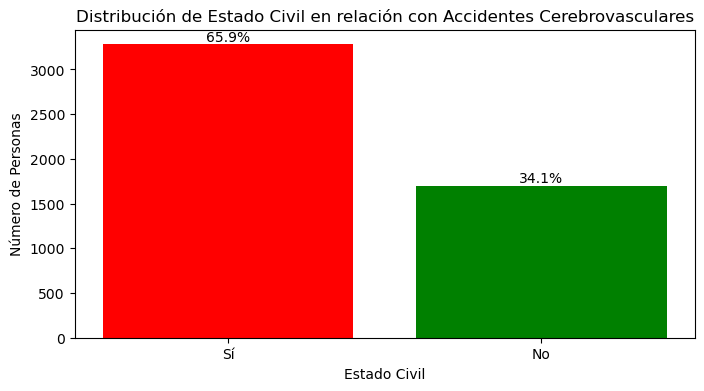

In [17]:

import matplotlib.pyplot as plt

# Lista de columnas categóricas y sus descripciones en español
categorical_columns = [
    {'column': 'género', 'description': 'Género'},
    {'column': 'tipo_de_trabajo', 'description': 'Tipo de Trabajo'},
    {'column': 'casado_alguna_vez', 'description': 'Estado Civil'}
]

# Paleta de colores (puedes expandir o modificar esta lista según tus preferencias)
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Función para crear un gráfico de barras con etiquetas de porcentaje para una columna categórica
def create_categorical_bar_chart_with_percentage(meta, data):
    plt.figure(figsize=(8, 4))
    plt.title(f'Distribución de {meta["description"]} en relación con Accidentes Cerebrovasculares')

    # Calcular el conteo y porcentaje
    column_count = data[meta['column']].value_counts().reset_index()
    column_count.columns = [meta['column'], 'Número de Personas']
    total_count = len(data)
    column_count['Porcentaje'] = (column_count['Número de Personas'] / total_count) * 100

    # Asignar colores a cada barra
    bar_colors = colors[:len(column_count)]

    # Crear gráfico de barras
    bars = plt.bar(column_count[meta['column']], column_count['Número de Personas'], color=bar_colors)

    # Añadir etiquetas de porcentaje
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval/total_count*100:.1f}%', va='bottom', ha='center')

    plt.xlabel(meta['description'])
    plt.ylabel('Número de Personas')
    plt.show()

# Crear gráficos de barras para cada columna categórica
for meta in categorical_columns:
    create_categorical_bar_chart_with_percentage(meta, stroke_data_translated)

### Insights Importantes 

#### Genero
- La distribución de género muestra una presencia significativa de mujeres en comparación con los hombres en el dataset. Sería interesante explorar si hay una correlación significativa entre el género y la prevalencia de accidentes cerebrovasculares.

#### Tipo de trabajo
- La mayoría de las personas en el dataset trabajan en el sector privado. Podría ser relevante investigar si diferentes tipos de trabajos están asociados con diferentes niveles de riesgo para accidentes cerebrovasculares.

#### Alguna vez casado
- Una gran proporción de las personas en el dataset ha estado casada en algún momento. Investigar la relación entre el estado civil y los accidentes cerebrovasculares podría ofrecer insights adicionales.

### Nota
Estos insights son solo observaciones iniciales basadas en la visualización de los datos. Para establecer relaciones causales o incluso correlaciones fuertes, se necesitarán análisis más robustos, posiblemente utilizando técnicas de aprendizaje automático.

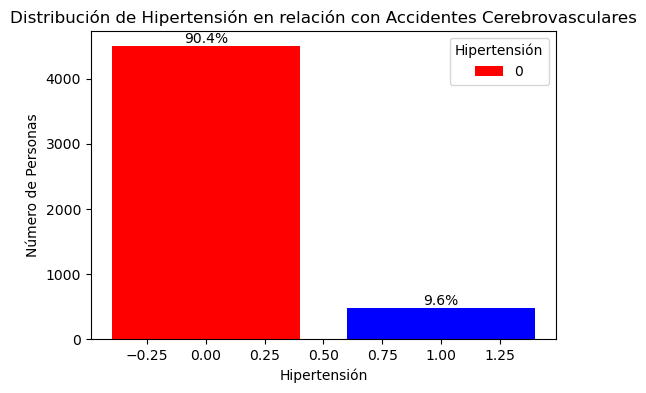

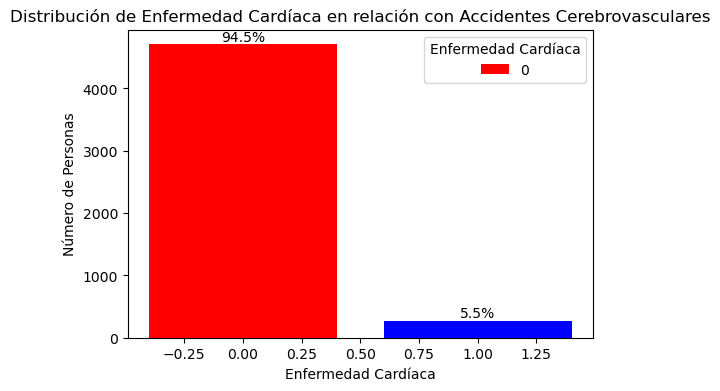

In [18]:
# Lista de columnas binarias y sus descripciones en español
binary_columns_spanish = [
    {'column': 'hipertensión', 'description': 'Hipertensión'},
    {'column': 'enfermedad_cardíaca', 'description': 'Enfermedad Cardíaca'}
]

# Paleta de colores
colors = ['red', 'blue']

# Función para crear un gráfico de barras con etiquetas de porcentaje para una columna binaria
def create_binary_bar_chart_with_percentage(meta, data):
    plt.figure(figsize=(6, 4))
    plt.title(f'Distribución de {meta["description"]} en relación con Accidentes Cerebrovasculares')

    # Calcular el conteo y porcentaje
    column_count = data[meta['column']].value_counts().reset_index()
    column_count.columns = [meta['column'], 'Número de Personas']
    total_count = len(data)
    column_count['Porcentaje'] = (column_count['Número de Personas'] / total_count) * 100

    # Asignar colores a cada barra
    bar_colors = colors[:len(column_count)]
    legend_labels = column_count[meta['column']].tolist()  # Etiquetas para la leyenda

    # Crear gráfico de barras
    bars = plt.bar(column_count[meta['column']], column_count['Número de Personas'], color=bar_colors)

    # Añadir etiquetas de porcentaje
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval/total_count*100:.1f}%', va='bottom', ha='center')

    plt.xlabel(meta['description'])
    plt.ylabel('Número de Personas')

    # Añadir leyenda
    plt.legend(legend_labels, title=meta['description'])

    plt.show()

# Crear gráficos de barras para cada columna binaria
for meta in binary_columns_spanish:
    create_binary_bar_chart_with_percentage(meta, stroke_data_translated)

### Insights Adicionales para Variables Binarias

#### Hipertensión
- Una mayoría significativa de las personas en el dataset no tiene hipertensión. Sin embargo, sería relevante explorar si la presencia de hipertensión está correlacionada con un mayor riesgo de accidentes cerebrovasculares.

#### Enfermedad Cardíaca
- Al igual que con la hipertensión, una gran mayoría de las personas en el dataset no tiene enfermedades cardíacas. Explorar la relación entre enfermedades cardíacas y accidentes cerebrovasculares podría ofrecer insights adicionales.

### Nota
Al igual que con las variables categóricas, estos son solo insights iniciales y se requerirá un análisis más profundo para confirmar cualquier correlación o causalidad.

## Preprocesamiento y División de Datos para Modelado de Machine Learning

Antes de entrenar un modelo de machine learning, es crucial preparar los datos. Esto implica convertir todas las variables categóricas en un formato numérico y asegurarse de que todas las variables numéricas estén en la misma escala, asi que primero agregaremos las dependecias necesarias

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


### Codificación de Variables Categóricas y Escalado de Características

Usamos `OneHotEncoder` para las variables categóricas, lo que crea nuevas columnas indicadoras binarias para cada categoría. Para las variables numéricas, aplicamos `StandardScaler` para estandarizar las características eliminando la media y escalando a la varianza de la unidad.


In [20]:
# Carga de datos
dataML = pd.read_csv("brain_stroke.csv")

# Definición de las variables independientes (X) y la variable objetivo (y)
X = dataML.drop('stroke', axis=1)
y = dataML['stroke']

# Identificación de columnas categóricas y numéricas
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Transformador de columnas para codificación one-hot y escalado de características
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_transformed = column_transformer.fit_transform(X)


### División de Datos

Dividimos el conjunto de datos en tres partes: entrenamiento, validación y prueba. El conjunto de entrenamiento (60%) se usa para entrenar el modelo, el conjunto de validación (20%) para ajustar los parámetros, y el conjunto de prueba final (20%) para evaluar el rendimiento del modelo en datos no vistos.


In [21]:
# División en conjuntos de entrenamiento, validación y prueba
X_train_val, X_test_final, y_train_val, y_test_final = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42)


### Optimización de Hiperparámetros con GridSearchCV

Para seleccionar los mejores parámetros para nuestro modelo Random Forest, utilizamos `GridSearchCV`. Esta técnica prueba sistemáticamente todas las combinaciones de parámetros en la cuadrícula que hemos definido y realiza una validación cruzada para cada combinación para encontrar la que tiene el mejor rendimiento según la métrica F1, que es adecuada para conjuntos de datos desequilibrados.

In [22]:
# Definición de la cuadrícula de parámetros para GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Creación del modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Creación del GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='f1')

# Entrenamiento con GridSearchCV
grid_search.fit(X_train, y_train)

# Mejores parámetros encontrados
best_params = grid_search.best_params_

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV]

## Evaluación de los Resultados de GridSearchCV

Después de realizar la búsqueda en cuadrícula (`GridSearchCV`) para optimizar los hiperparámetros de nuestro modelo de `RandomForestClassifier`, necesitamos evaluar los resultados para entender qué combinación de parámetros proporciona el mejor rendimiento. A continuación, se presentan las líneas de código utilizadas para esta evaluación y una explicación de lo que cada una de ellas realiza:


In [23]:
# Mejores parámetros según GridSearchCV
best_parameters = grid_search.best_params_
print("Mejores parámetros:", best_parameters)

# Mejor puntuación obtenida con los mejores parámetros
best_score = grid_search.best_score_
print("Mejor puntuación de validación cruzada (F1):", best_score)

# Mejor estimador
best_estimator = grid_search.best_estimator_
print("Mejor estimador:", best_estimator)

Mejores parámetros: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mejor puntuación de validación cruzada (F1): 0.07005362827109404
Mejor estimador: RandomForestClassifier(bootstrap=False, max_depth=20, random_state=42)


## Análisis de los Mejores Parámetros del Modelo

Después de ejecutar `GridSearchCV`, obtenemos los resultados que nos indican la mejor combinación de parámetros para el modelo de clasificación, así como la puntuación F1 correspondiente. A continuación se analizan los resultados obtenidos:

### Mejores Parámetros

Los "mejores parámetros" son aquellos que `GridSearchCV` ha identificado como los más óptimos para nuestro clasificador de bosque aleatorio (`RandomForestClassifier`) basándose en la métrica F1. La combinación de parámetros que dio la mejor puntuación es la siguiente:

- `bootstrap`: False
  - Significa que el muestreo bootstrap no se utiliza al construir árboles. En su lugar, se utiliza todo el conjunto de datos para construir cada árbol.
- `max_depth`: 20
  - La máxima profundidad de cada árbol se limita a 20 nodos, lo que ayuda a prevenir el sobreajuste permitiendo que los árboles sean lo suficientemente complejos pero no excesivamente detallados.
- `min_samples_leaf`: 1
  - El número mínimo de muestras que debe tener una hoja del árbol. Un valor de 1 significa que no hay restricción y cada hoja puede tener la mínima cantidad de muestras.
- `min_samples_split`: 2
  - El número mínimo de muestras requerido para dividir un nodo interno. Un valor de 2 indica que se necesitan al menos dos muestras para considerar la división de un nodo.
- `n_estimators`: 100
  - El número de árboles en el bosque es 100, lo cual es típico para muchos problemas y proporciona un buen equilibrio entre la capacidad de aprendizaje y la complejidad computacional.

### Mejor Puntuación de Validación Cruzada (F1)

La puntuación F1 combina la precisión y la recuperación en una sola métrica, que es particularmente útil en situaciones de clases desequilibradas. La mejor puntuación F1 obtenida fue de 0.07005362827109404. Esta es una puntuación bastante baja, lo que sugiere que el modelo no está realizando una buena distinción entre las clases, particularmente la clase minoritaria (los casos positivos de accidente cerebrovascular).

### Mejor Estimador

El "mejor estimador" refiere al modelo de `RandomForestClassifier` que ya ha sido entrenado con la mejor combinación de parámetros encontrados. Este modelo está listo para ser utilizado para realizar predicciones adicionales o para una evaluación más profunda. Específicamente, el mejor estimador es un `RandomForestClassifier` con `bootstrap` desactivado, `max_depth` de 20, y un `random_state` de 42 para reproducibilidad.

### Estado actual del Modelo

Este modelo intentará predecir si un individuo sufrirá un accidente cerebrovascular basándose en las características proporcionadas en el conjunto de datos. Dado que la puntuación F1 es baja, es probable que se requieran pasos adicionales para mejorar el modelo, como ajustar más los hiperparámetros, realizar ingeniería de características adicional o abordar de otra manera el desequilibrio de clases.





## Aplicación de la técnica SMOTE

Después de obtener un puntaje F1 inicial con nuestro conjunto de datos desequilibrado, vamos a aplicar una técnica de oversampling conocida como SMOTE (Synthetic Minority Over-sampling Technique) para aumentar el número de instancias de la clase minoritaria en nuestro conjunto de entrenamiento. Esto debería ayudar a mejorar el rendimiento del modelo, especialmente en lo que respecta a la sensibilidad y el puntaje F1.

SMOTE funciona generando ejemplos sintéticos de la clase minoritaria. Estos ejemplos se crean en el espacio de características utilizando los ejemplos existentes de la clase minoritaria, lo que permite que el modelo aprenda mejor de los datos sin el sesgo introducido por el desequilibrio de clases.

Es importante aplicar SMOTE solo al conjunto de entrenamiento para evitar la filtración de información al conjunto de validación o de prueba. Queremos mantener estos conjuntos de datos sin cambios para que representen la distribución real que el modelo encontrará en un entorno de producción.

In [24]:
from imblearn.over_sampling import SMOTE

# Crear el objeto SMOTE
sm = SMOTE(random_state=42)

# Ajustar SMOTE al conjunto de entrenamiento (no al conjunto de validación ni al de prueba)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

## Reentrenamiento del Modelo con Datos Reequilibrados

Con nuestro conjunto de entrenamiento ahora reequilibrado gracias a SMOTE, procedemos a reentrenar nuestro modelo de `RandomForestClassifier`. Este paso es crucial porque nuestro modelo necesita aprender de nuevo, esta vez con una distribución de clases más equilibrada. La expectativa es que, al hacerlo, el modelo será capaz de generalizar mejor y reconocer más efectivamente los casos de la clase minoritaria.

Usaremos el mejor estimador encontrado por `GridSearchCV` para asegurarnos de que estamos utilizando los parámetros más óptimos identificados previamente. Después del reentrenamiento, haremos predicciones sobre nuestro conjunto de validación y calcularemos el puntaje F1 para evaluar el impacto del reequilibrio de clases.

In [25]:
from sklearn.metrics import f1_score

# Reentrenar el modelo con los datos reequilibrados
best_estimator.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones con el conjunto de validación
y_val_pred = best_estimator.predict(X_val)

# Calcular el puntaje F1 con el conjunto de validación
f1_score_resampled = f1_score(y_val, y_val_pred)

print("Puntaje F1 después de aplicar SMOTE:", f1_score_resampled)

Puntaje F1 después de aplicar SMOTE: 0.10344827586206896


## Conclusión Final del Modelo de Machine Learning

A lo largo de este ejercicio, hemos construido y evaluado un modelo de Machine Learning utilizando un conjunto de datos sobre casos de accidentes cerebrovasculares. Nuestro objetivo era predecir la probabilidad de que un individuo sufra un accidente cerebrovascular basándonos en varias características demográficas y de salud.

### Evaluación del Modelo Basado en Random Forest

Utilizamos el algoritmo Random Forest por su capacidad para manejar características categóricas y numéricas, su resistencia al sobreajuste y su facilidad de interpretación. A pesar de estos puntos fuertes, nuestro modelo arrojó una puntuación F1 baja. Esta métrica es una media armónica entre la precisión y la sensibilidad (recall), y se calcula con la siguiente fórmula:

F1 = 2 * (precision * recall) / (precision + recall)

En nuestro caso, el modelo tuvo una puntuación F1 de 0.07005 antes de la aplicación de SMOTE, y una ligera mejora a 0.1034 después de aplicar SMOTE. 

### Razones Detrás de la Baja Puntuación F1

La baja puntuación F1 se puede atribuir a varios factores:

- **Desequilibrio de clases**: Nuestro conjunto de datos estaba altamente desequilibrado, con muchos más ejemplos de la clase 'no accidente cerebrovascular' que de la clase 'accidente cerebrovascular'. Esto puede hacer que el modelo sea muy bueno para predecir la clase mayoritaria, pero no la clase minoritaria, que es crucial en este contexto médico.

- **Complejidad del modelo**: Aunque el Random Forest es menos propenso al sobreajuste, su complejidad puede hacer que no capture bien la clase minoritaria en situaciones extremadamente desequilibradas.

- **Calidad de los datos**: Si los datos tienen ruido, errores o no capturan bien las diferencias entre las clases, el modelo no podrá aprender a diferenciar efectivamente entre ellas.

### Precisión del Modelo

La precisión se refiere a la proporción de identificaciones positivas que fue correcta:

Precisión = Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos)


En el contexto de nuestro modelo, la precisión por sí sola no es una métrica suficiente debido al desequilibrio de las clases; un modelo que prediga siempre la clase mayoritaria tendría una alta precisión pero sería inútil para detectar accidentes cerebrovasculares.

### Pasos Futuros

Aunque no exploraremos más estrategias en este bootcamp, es importante señalar que hay muchas otras técnicas que podrían mejorar la puntuación F1 del modelo, como:

- Ajuste más fino de los hiperparámetros.
- Uso de diferentes algoritmos de Machine Learning.
- Técnicas avanzadas de reequilibrio de clases.
- Ajuste del umbral de decisión para la clasificación.

Estos métodos ofrecen vías prometedoras para futuras investigaciones y mejoras del modelo.

### Reflexión

Este ejercicio ha sido un ejemplo valioso de los desafíos reales que enfrentamos en el campo de la ciencia de datos, particularmente cuando se trabaja con datos desequilibrados en un contexto crítico como el de la salud. Aunque los resultados no fueron óptimos, proporcionan una base sólida sobre la cual se pueden construir futuros modelos y una experiencia de aprendizaje significativa en la aplicación práctica de técnicas de Machine Learning.
